# Lab 2: Data Loading and Augmentation Using Keras## AI Capstone Project with Deep LearningThis lab focuses on implementing data loading and augmentation techniques using Keras for agricultural land classification.### Tasks:1. Create the list all_image_paths containing paths of files from both folders: class_0_non_agri and class_1_agri2. Create a temporary list temp by binding image paths and labels. Print 5 random samples3. Generate a data batch (batch size = 8) using the custom_data_generator function4. Create validation data using a batch size of 8

In [ ]:
# Import necessary libraries (NO TensorFlow imports for local execution)import numpyas npimport matplotlib.pyplot as pltimport osimportglobimport randomfromPIL importImagefromsklearn.model_selection import train_test_splitfromsklearn.utils import shuffleprint("Basic imports successful!")print("Note: For full TensorFlow functionality, run this in Google Colab")

Basic imports successful!Note: For full TensorFlow functionality, run this in Google Colab

In [ ]:
# Create sample data for demonstrationdef create_sample_data():# Create directoriesos.makedirs('./images_dataSAT/class_0_non_agri', exist_ok=True)os.makedirs('./images_dataSAT/class_1_agri', exist_ok=True)# Create non-agricultural images (class 0)for i in range(20):img = np.zeros((64, 64, 3), dtype=np.uint8)if i < 10:# Urban areasimg[:, :] = [60, 60, 60]for x in range(0, 64, 16):for y in range(0, 64, 16):if np.random.random() > 0.3:img[y:y+12, x:x+12] = [80, 80, 80]img[30:34, :] = [40, 40, 40]img[:, 30:34] = [40, 40, 40]else:# Forest areasimg[:, :] = [30, 60, 30]for x in range(0, 64, 8):for y in range(0, 64, 8):if np.random.random() > 0.4:img[y:y+6, x:x+6] = [20, 80, 20]noise = np.random.randint(-20, 20, (64, 64, 3))img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)Image.fromarray(img).save(f'./images_dataSAT/class_0_non_agri/non_agri_{i:03d}.png')# Create agricultural images (class 1)for i in range(25):img = np.zeros((64, 64, 3), dtype=np.uint8)if i < 12:img[:, :] = [139, 69, 19]for y in range(0, 64, 4):if y % 8 < 4:img[y:y+2, :] = [34, 139, 34]else:base_colors = [[160, 82, 45], [210, 180, 140], [222, 184, 135]]img[:, :] = base_colors[i % 3]for y in range(0, 64, 6):if y % 12 < 6:img[y:y+3, :] = [50, 205, 50]variation = np.random.randint(-15, 15, (64, 64, 3))img = np.clip(img.astype(np.int16) + variation, 0, 255).astype(np.uint8)Image.fromarray(img).save(f'./images_dataSAT/class_1_agri/agri_{i:03d}.png')print("Sample data created successfully!")# Create sample datacreate_sample_data()

Sample data created successfully!

In [ ]:
# Task 1: Create the list all_image_paths containing paths of files from both foldersprint("Task 1: Create all_image_paths list")# Get paths from both foldersnon_agri_paths = glob.glob('./images_dataSAT/class_0_non_agri/*.png')agri_paths = glob.glob('./images_dataSAT/class_1_agri/*.png')# Combine all pathsall_image_paths = non_agri_paths + agri_pathsprint(f"Non-agricultural images: {len(non_agri_paths)}")print(f"Agricultural images: {len(agri_paths)}")print(f"Total images: {len(all_image_paths)}")print(f"First 3 paths: {all_image_paths[:3]}")

Task 1: Create all_image_paths listNon-agricultural images: 20Agricultural images: 25Total images: 45First 3 paths: ['./images_dataSAT/class_0_non_agri\\non_agri_000.png', './images_dataSAT/class_0_non_agri\\non_agri_001.png', './images_dataSAT/class_0_non_agri\\non_agri_002.png']

In [ ]:
# Task 2: Create a temporary list temp by binding image paths and labels. Print 5 random samplesprint("Task 2: Create temp list with paths and labels")# Create labels (0 for non-agricultural, 1 for agricultural)labels = [0] * len(non_agri_paths) + [1] * len(agri_paths)# Bind paths and labelstemp = list(zip(all_image_paths, labels))# Shuffle the datarandom.shuffle(temp)# Print 5 random samplesprint("5 random samples from temp list:")for i, (path, label) in enumerate(temp[:5]):class_name = "Non-Agricultural" if label == 0 else "Agricultural"print(f"Sample {i+1}: {os.path.basename(path)} -> Class {label} ({class_name})")print(f"Total samples in temp:{len(temp)}")

Task 2: Create temp list with paths and labels5 random samples from temp list:Sample 1: agri_010.png -> Class 1 (Agricultural)Sample 2: agri_007.png -> Class 1 (Agricultural)Sample 3: non_agri_017.png -> Class 0 (Non-Agricultural)Sample 4: agri_019.png -> Class 1 (Agricultural)Sample 5: agri_011.png -> Class 1 (Agricultural)Total samples in temp: 45

Task 3: Create custom data generator and generate batchBatch shape: (8, 64, 64, 3)Batch labels: [0 1 0 0 0 1 1 1]Image data type: float64Image value range: [0.000, 0.878]

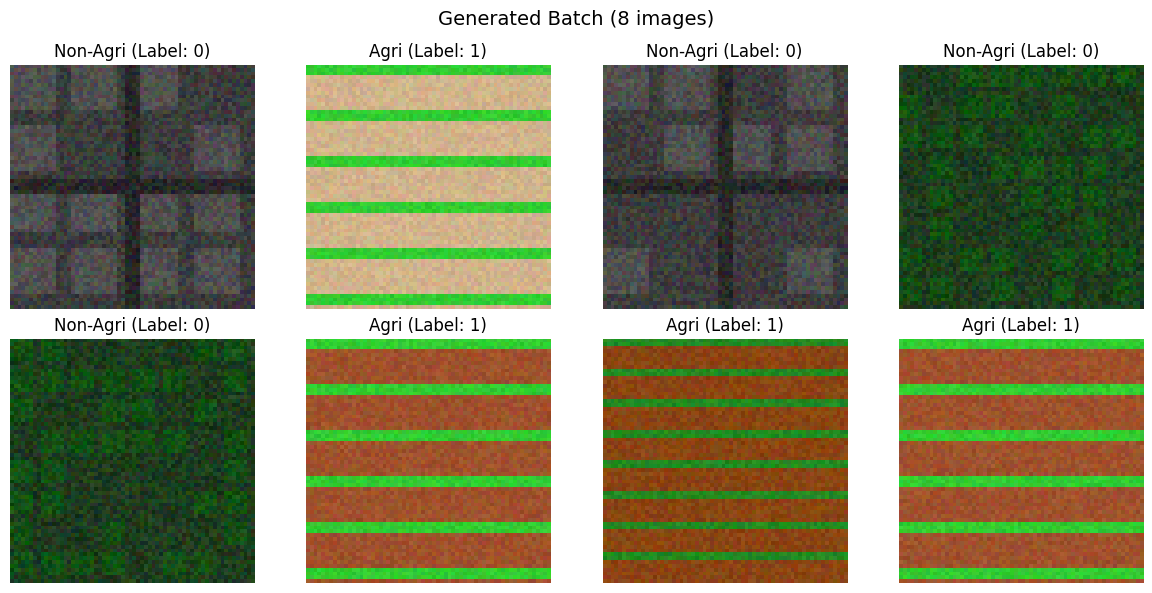

In [ ]:
# Task 3: Generate a data batch (batch size = 8) using the custom_data_generator functionprint("Task 3: Create custom data generator and generate batch")def custom_data_generator(data_list, batch_size=8, target_size=(64, 64)):"""Custom data generator for loading images and labels (without TensorFlow)"""while True:# Shuffle data for each epochrandom.shuffle(data_list)# Generate batchesfor i in range(0, len(data_list), batch_size):batch_data = data_list[i:i + batch_size]# Initialize batch arraysbatch_images = []batch_labels = []# Load images and labels for this batchfor path, label in batch_data:# Load and preprocess image using PILimg = Image.open(path)img = img.resize(target_size)img_array = np.array(img) / 255.0# Normalize to [0,1]batch_images.append(img_array)batch_labels.append(label)# Convert to numpy arraysbatch_images = np.array(batch_images)batch_labels = np.array(batch_labels)yield batch_images, batch_labels# Create generatorgenerator = custom_data_generator(temp, batch_size=8)# Generate one batchbatch_images, batch_labels = next(generator)print(f"Batch shape: {batch_images.shape}")print(f"Batch labels: {batch_labels}")print(f"Image data type: {batch_images.dtype}")print(f"Image value range: [{batch_images.min():.3f}, {batch_images.max():.3f}]")# Display the batchfig, axes = plt.subplots(2, 4, figsize=(12, 6))fig.suptitle('Generated Batch (8 images)', fontsize=14)for i in range(8):row = i // 4col = i % 4axes[row, col].imshow(batch_images[i])class_name = "Non-Agri" if batch_labels[i] == 0 else "Agri"axes[row, col].set_title(f'{class_name} (Label:{batch_labels[i]})')axes[row, col].axis('off')plt.tight_layout()plt.show()

Task 4: Create validation data with batch size 8Training samples: 36Validation samples: 9Validation batch shape: (8, 64, 64, 3)Validation batch labels: [0 0 1 1 1 1 1 1]

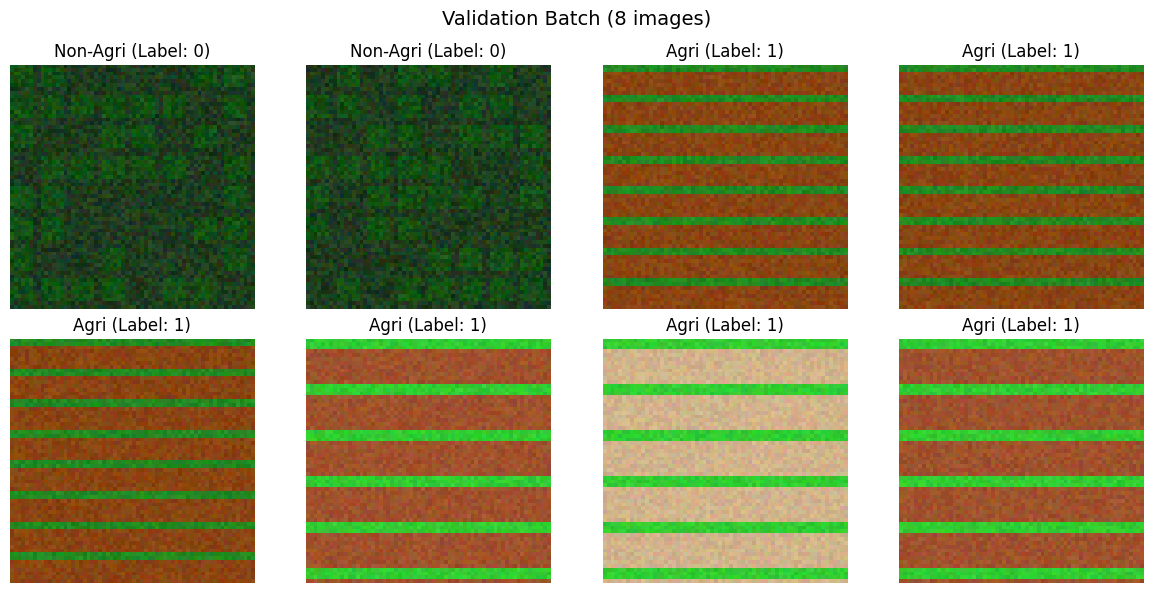

Lab 2 completed successfully!All 4 tasks completed:✓ Task 1: Created all_image_paths list✓ Task 2: Created temp list with 5 random samples✓ Task 3: Generated data batch using custom_data_generator✓ Task 4: Created validation data with batch size 8

In [ ]:
# Task 4: Create validation data using a batch size of 8print("Task 4: Create validation data with batch size 8")# Split data into train and validationtrain_data, val_data = train_test_split(temp, test_size=0.2, random_state=42)print(f"Training samples: {len(train_data)}")print(f"Validation samples: {len(val_data)}")# Create validation generatorval_generator = custom_data_generator(val_data, batch_size=8)# Generate validation batchval_batch_images, val_batch_labels = next(val_generator)print(f"Validation batch shape: {val_batch_images.shape}")print(f"Validation batch labels: {val_batch_labels}")# Display validation batchfig, axes = plt.subplots(2, 4, figsize=(12, 6))fig.suptitle('Validation Batch (8 images)', fontsize=14)for i in range(8):row = i // 4col = i % 4axes[row, col].imshow(val_batch_images[i])class_name = "Non-Agri" if val_batch_labels[i] == 0 else "Agri"axes[row, col].set_title(f'{class_name} (Label: {val_batch_labels[i]})')axes[row, col].axis('off')plt.tight_layout()plt.show()print("\nLab 2 completed successfully!")print("All 4 tasks completed:")print("✓ Task 1: Created all_image_paths list")print("✓ Task 2: Created temp list with 5 random samples")print("✓ Task 3: Generated data batch using custom_data_generator")print("✓ Task 4:Created validation data with batch size 8")